## Libraries and Data preparation

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functions import *

# For the PCA and K-means
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from fuzzywuzzy import process

# For some graphs I got warnings that I corrected but kept popping up anyways so I needed these:
import os
import warnings

# For hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# I want to see every column,
pd.set_option('display.max_columns', None)

# For silhouette scores
from sklearn.metrics import silhouette_score


In [166]:
df=pd.read_csv('data_clean/df.csv')
countries=pd.read_csv('data_clean/countries.csv')

In [167]:
#Setting indexes to area_c because during saving they go re_indexed
df = df.set_index('area_c')
countries = countries.set_index('area_c')

## Exploration and Graphs

In [168]:
df.head()

p_ds        m_ds   p_ps   m_ps      p_imp       m_imp       pop  \
area_c                                                                         
4        1.444662    8.804261   0.66   3.94   0.681444    0.844991  36686.78   
8        9.384743   39.624471   4.29  17.26   4.170997    6.604079   2877.01   
12       6.821378   20.082520   3.10   8.87   0.000000    1.621866  41927.01   
24      12.022947   25.165052   5.45  10.68  10.711934   15.380419  31273.53   
28      76.394194  120.048019  30.30  38.30  76.394194  120.048019     91.63   

             kfc      p_ds%      m_ds%      p_ps%      m_ps%      p_imp%  \
area_c                                                                     
4       0.000000 -27.481711 -15.760706 -26.666667 -15.631692  -36.209052   
8       0.000695 -30.671774  -9.396445 -30.806452  -9.110058  -55.492991   
12      0.000000  -6.404818  -5.800537  -6.906907  -5.738576 -100.000000   
24      0.000288  36.391447  12.873968  36.591479  13.617021   43.918787   
28      0.000000  38.365164  20.794985  43.806360  27.922512   38.365164   

           m_imp%      pop%   kfc%  
area_c                              
4      -34.961585  5.920307    0.0  
8      -48.576361 -0.140573    0.0  
12     -28.104401  3.935812 -100.0  
24      23.870794  7.267358   50.0  
28      35.894358  1.181537    0.0

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 4 to 894
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p_ds    176 non-null    float64
 1   m_ds    176 non-null    float64
 2   p_ps    176 non-null    float64
 3   m_ps    176 non-null    float64
 4   p_imp   176 non-null    float64
 5   m_imp   176 non-null    float64
 6   pop     176 non-null    float64
 7   kfc     176 non-null    float64
 8   p_ds%   176 non-null    float64
 9   m_ds%   176 non-null    float64
 10  p_ps%   176 non-null    float64
 11  m_ps%   176 non-null    float64
 12  p_imp%  176 non-null    float64
 13  m_imp%  176 non-null    float64
 14  pop%    176 non-null    float64
 15  kfc%    176 non-null    float64
dtypes: float64(16)
memory usage: 23.4 KB


In [170]:
df.describe()

p_ds        m_ds        p_ps        m_ps       p_imp       m_imp  \
count  176.000000  176.000000  176.000000  176.000000  176.000000  176.000000   
mean    22.939481   52.737279    9.679091   21.422898   10.335591   21.847240   
std     19.692966   32.595656    7.862643   12.579030   16.388049   27.566514   
min      0.435030    2.262154    0.180000    0.990000    0.000000    0.000000   
25%      7.792607   21.895563    3.520000    9.955000    0.428905    1.957402   
50%     19.504638   49.350011    8.705000   21.355000    3.488348   10.728962   
75%     31.854217   78.984669   13.415000   31.137500   12.145516   31.555889   
max     95.374344  133.524082   36.490000   50.600000   85.836910  120.048019   

                pop         kfc       p_ds%       m_ds%       p_ps%  \
count  1.760000e+02  176.000000  176.000000  176.000000  176.000000   
mean   4.330080e+04    0.003106    8.656431    3.799891    9.002270   
std    1.546218e+05    0.006638   27.410225   12.367503   27.781193   
min    4.776000e+01    0.000000  -49.274972  -27.150093  -51.863354   
25%    2.769340e+03    0.000000   -2.763559   -1.698751   -2.543319   
50%    9.972685e+03    0.000265    3.976919    2.624694    3.736887   
75%    3.150613e+04    0.003038   10.407759    7.454745   11.037660   
max    1.448928e+06    0.042905  218.797312   86.538701  215.789474   

            m_ps%       p_imp%       m_imp%        pop%          kfc%  
count  176.000000   176.000000   176.000000  176.000000    176.000000  
mean     3.782204    24.697489    26.591065    2.576895    853.366053  
std     11.505478   164.954929   125.319762    2.398344   5529.768688  
min    -27.032735  -100.000000   -70.888841   -4.917698   -100.000000  
25%     -1.812179    -3.648823    -4.019449    0.754955    -17.303030  
50%      2.958112     1.828121     5.944295    2.533884      0.000000  
75%      7.447978    18.298112    19.664546    4.441710      0.000000  
max     83.956044  1611.802753  1362.497286    7.911961  68700.000000

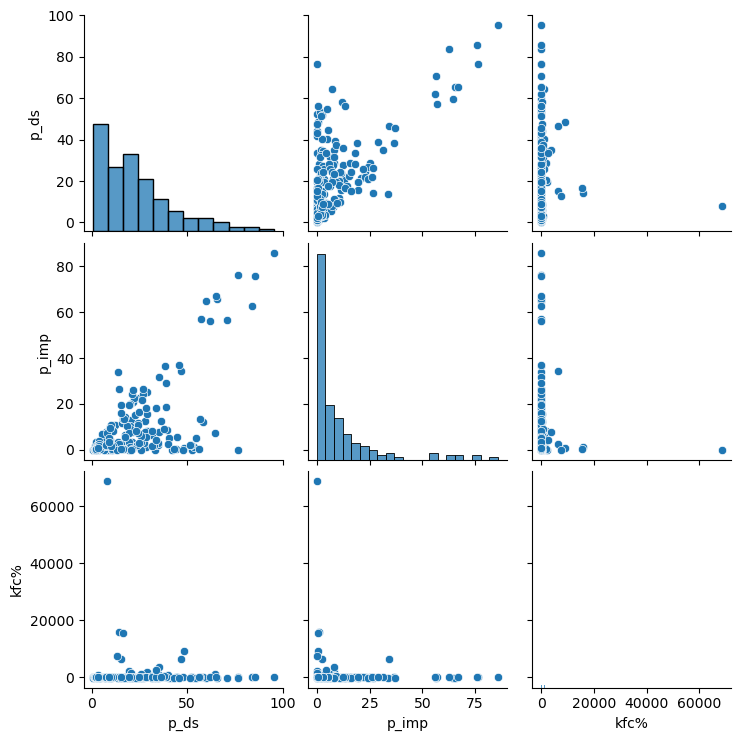

In [171]:
#poultry pearplot
sns.pairplot(df[['p_ds','p_imp', 'kfc%' ]].reset_index(drop=True))
plt.show()

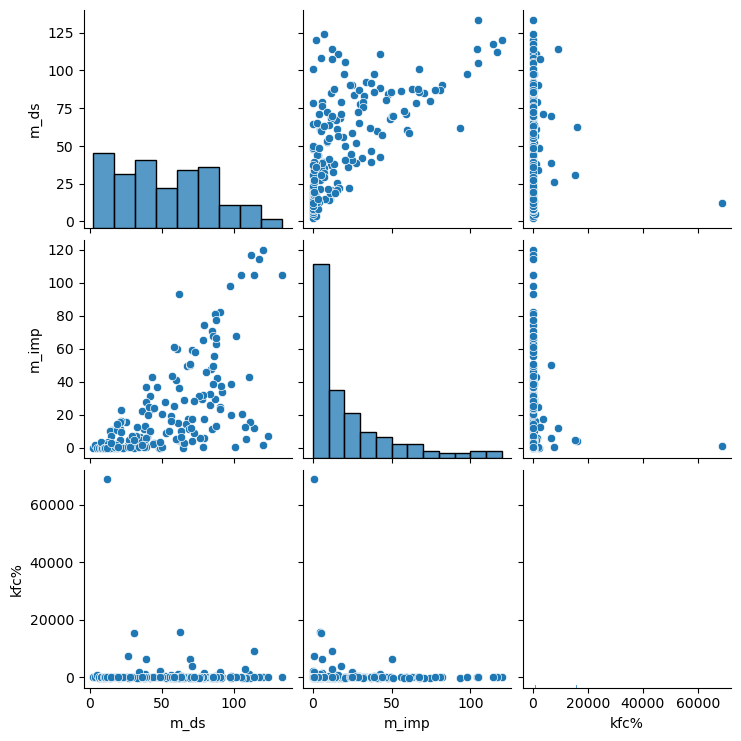

In [172]:
sns.pairplot(df[['m_ds','m_imp', 'kfc%' ]].reset_index(drop=True))
plt.show()

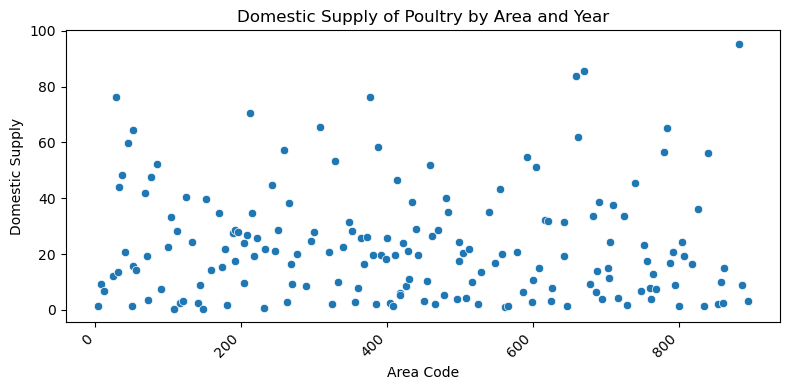

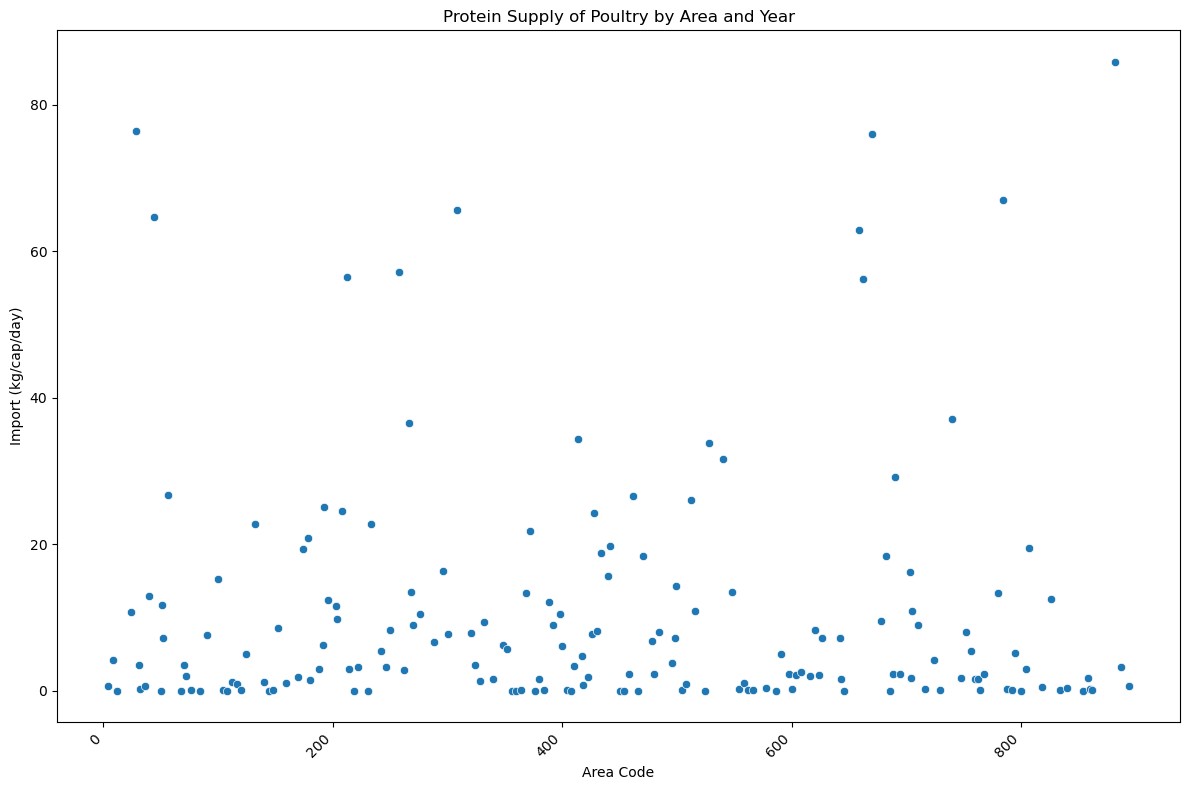

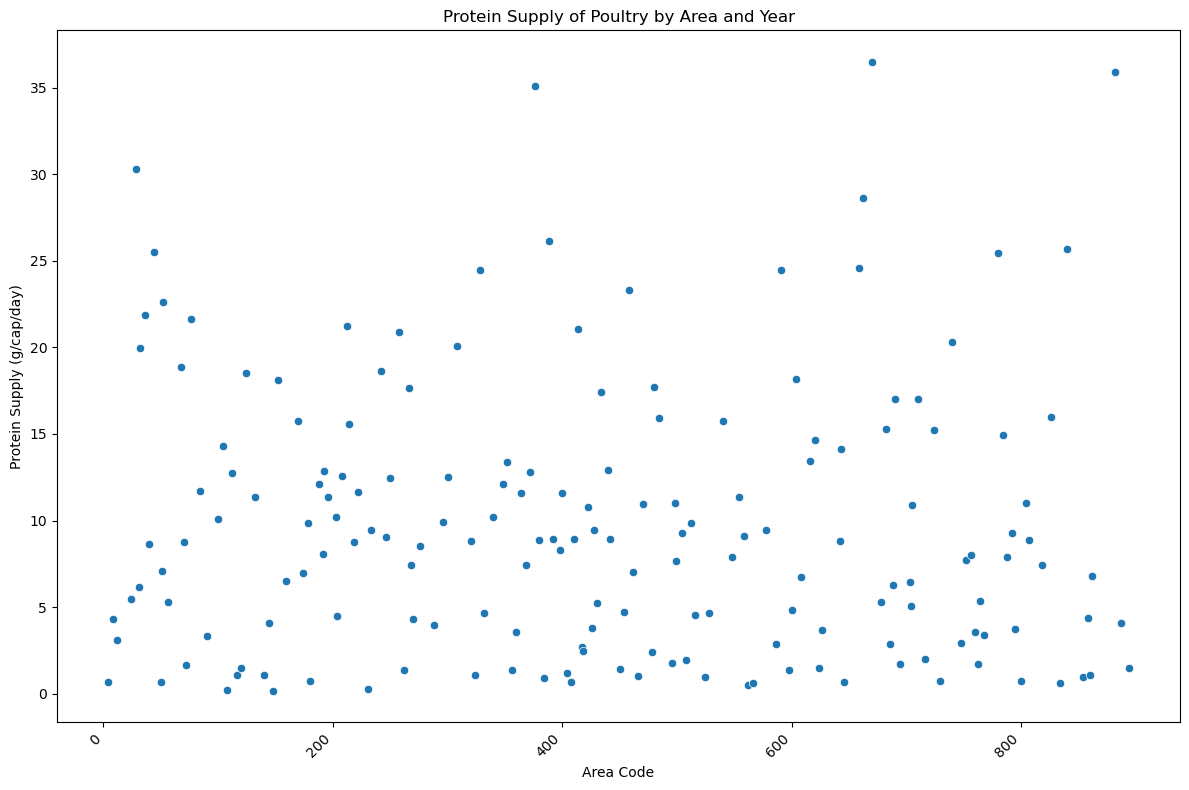

In [173]:
# Instead, I'm thinking of making a histogram for checking distribution
# Checking for outliers 
# Plotting poultry domestic supply
plt.figure(figsize=(8, 4))

sns.scatterplot(data=df, x='area_c', y='p_ds')

plt.xlabel('Area Code')
plt.ylabel('Domestic Supply')
plt.title('Domestic Supply of Poultry by Area and Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting poultry import supply
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='area_c', y='p_imp')

plt.xlabel('Area Code')
plt.ylabel('Import (kg/cap/day)')
plt.title('Protein Supply of Poultry by Area and Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting poultry daily consumption
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='area_c', y='p_ps')

plt.xlabel('Area Code')
plt.ylabel('Protein Supply (g/cap/day)')
plt.title('Protein Supply of Poultry by Area and Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Kaiser-Meyer-Olkin (KMO) Test 

In [174]:
df.columns

Index(['p_ds', 'm_ds', 'p_ps', 'm_ps', 'p_imp', 'm_imp', 'pop', 'kfc', 'p_ds%',
       'm_ds%', 'p_ps%', 'm_ps%', 'p_imp%', 'm_imp%', 'pop%', 'kfc%'],
      dtype='object')

In [175]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_all, kmo_model)

[0.58094368 0.60760512 0.57761561 0.59446963 0.69079756 0.70677556
 0.61522164 0.86447485 0.47999641 0.51772294 0.47731359 0.53248907
 0.53703404 0.54260427 0.8197226  0.53881671] 0.5878847204346499


## Prep for PCA

Null Hypothesis (H0): There is no significant deviation from a Gaussian distribution within the dataset. In other words, it assumes that the data follows a Gaussian distribution.

Alternative Hypothesis (H1): The data significantly deviates from a Gaussian distribution. This could imply various forms of non-normality, such as skewness, heavy tails, or multimodality. 

### Guassian tests

In [176]:
df.describe()

p_ds        m_ds        p_ps        m_ps       p_imp       m_imp  \
count  176.000000  176.000000  176.000000  176.000000  176.000000  176.000000   
mean    22.939481   52.737279    9.679091   21.422898   10.335591   21.847240   
std     19.692966   32.595656    7.862643   12.579030   16.388049   27.566514   
min      0.435030    2.262154    0.180000    0.990000    0.000000    0.000000   
25%      7.792607   21.895563    3.520000    9.955000    0.428905    1.957402   
50%     19.504638   49.350011    8.705000   21.355000    3.488348   10.728962   
75%     31.854217   78.984669   13.415000   31.137500   12.145516   31.555889   
max     95.374344  133.524082   36.490000   50.600000   85.836910  120.048019   

                pop         kfc       p_ds%       m_ds%       p_ps%  \
count  1.760000e+02  176.000000  176.000000  176.000000  176.000000   
mean   4.330080e+04    0.003106    8.656431    3.799891    9.002270   
std    1.546218e+05    0.006638   27.410225   12.367503   27.781193   
min    4.776000e+01    0.000000  -49.274972  -27.150093  -51.863354   
25%    2.769340e+03    0.000000   -2.763559   -1.698751   -2.543319   
50%    9.972685e+03    0.000265    3.976919    2.624694    3.736887   
75%    3.150613e+04    0.003038   10.407759    7.454745   11.037660   
max    1.448928e+06    0.042905  218.797312   86.538701  215.789474   

            m_ps%       p_imp%       m_imp%        pop%          kfc%  
count  176.000000   176.000000   176.000000  176.000000    176.000000  
mean     3.782204    24.697489    26.591065    2.576895    853.366053  
std     11.505478   164.954929   125.319762    2.398344   5529.768688  
min    -27.032735  -100.000000   -70.888841   -4.917698   -100.000000  
25%     -1.812179    -3.648823    -4.019449    0.754955    -17.303030  
50%      2.958112     1.828121     5.944295    2.533884      0.000000  
75%      7.447978    18.298112    19.664546    4.441710      0.000000  
max     83.956044  1611.802753  1362.497286    7.911961  68700.000000

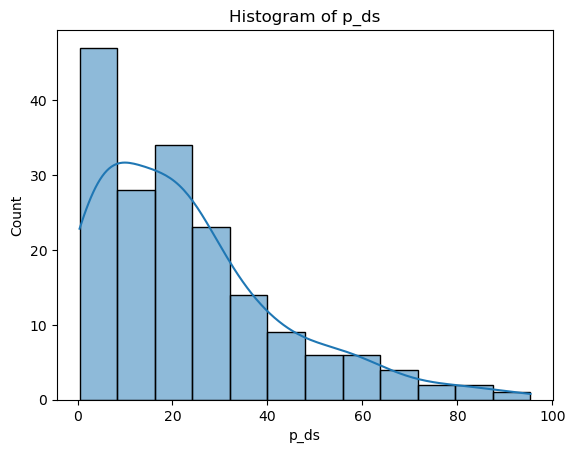

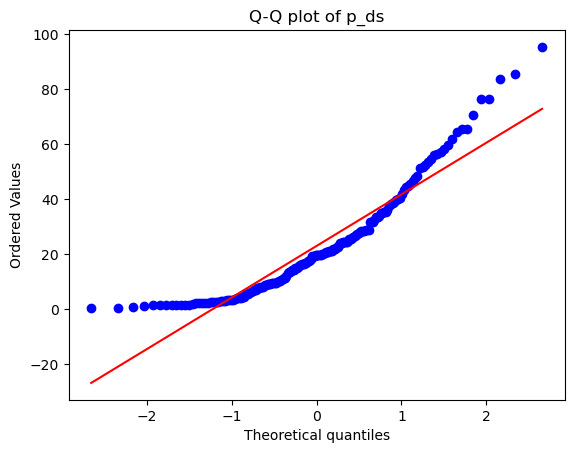

Shapiro-Wilk Test for p_ds: p-value=3.990940078413274e-10
D’Agostino’s K^2 Test for p_ds: p-value=6.369299287891783e-09



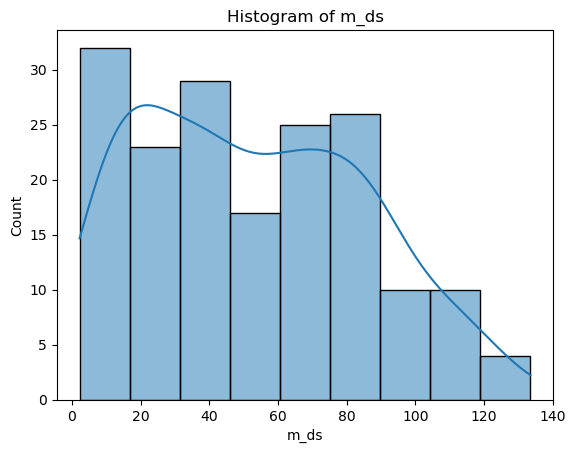

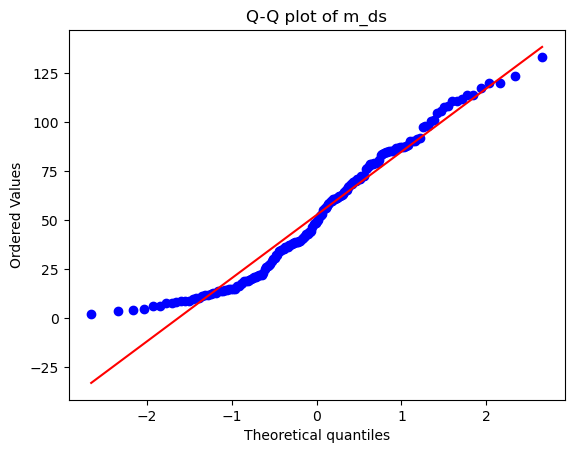

Shapiro-Wilk Test for m_ds: p-value=2.6808316761162132e-05
D’Agostino’s K^2 Test for m_ds: p-value=1.0252443224095395e-05



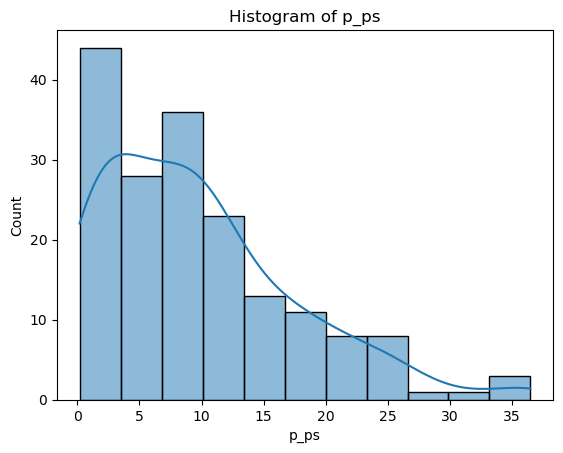

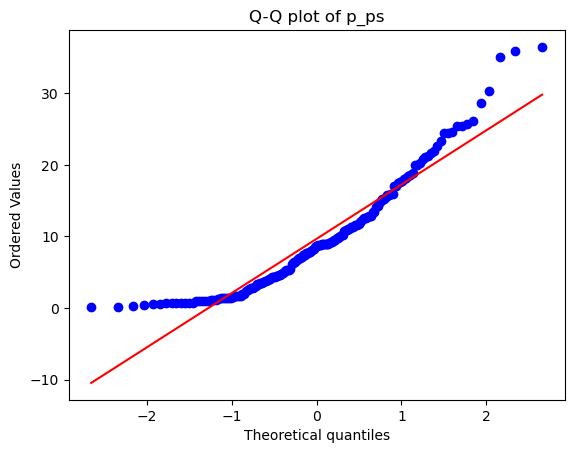

Shapiro-Wilk Test for p_ps: p-value=5.649234857685315e-09
D’Agostino’s K^2 Test for p_ps: p-value=2.8870049718706377e-07



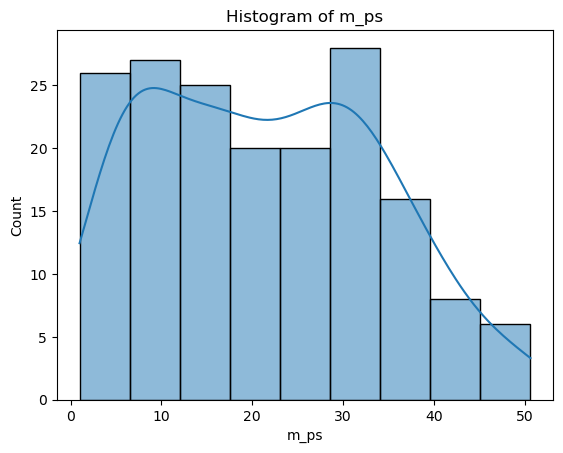

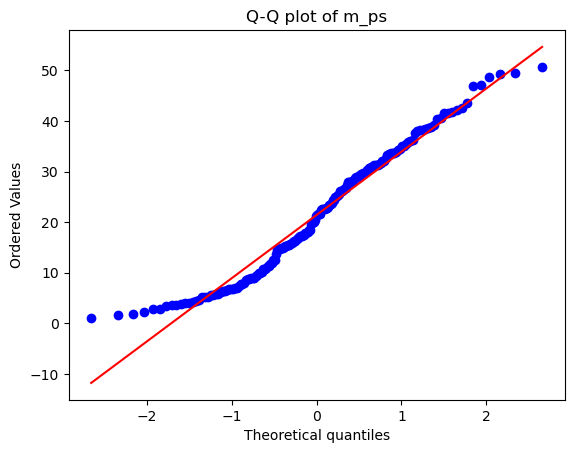

Shapiro-Wilk Test for m_ps: p-value=0.0001082280941773206
D’Agostino’s K^2 Test for m_ps: p-value=2.047621588708103e-05



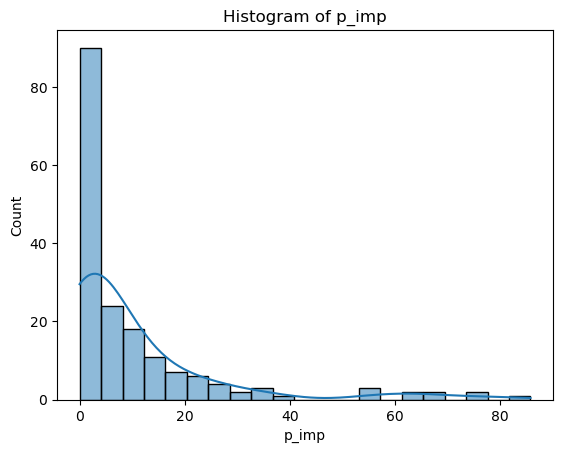

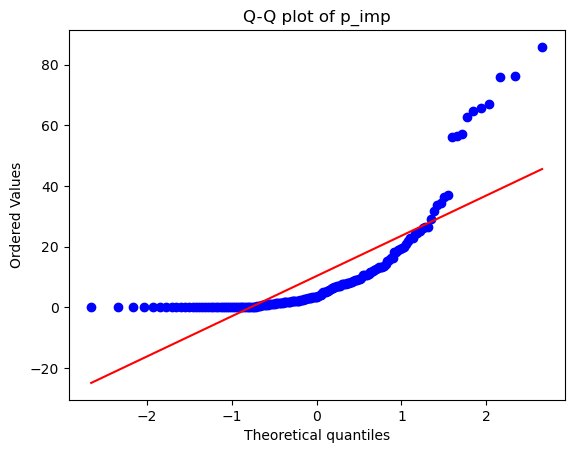

Shapiro-Wilk Test for p_imp: p-value=5.598839701477821e-19
D’Agostino’s K^2 Test for p_imp: p-value=3.890470750332264e-25



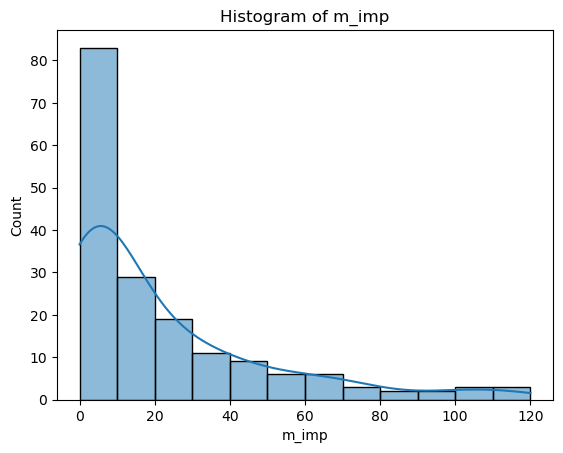

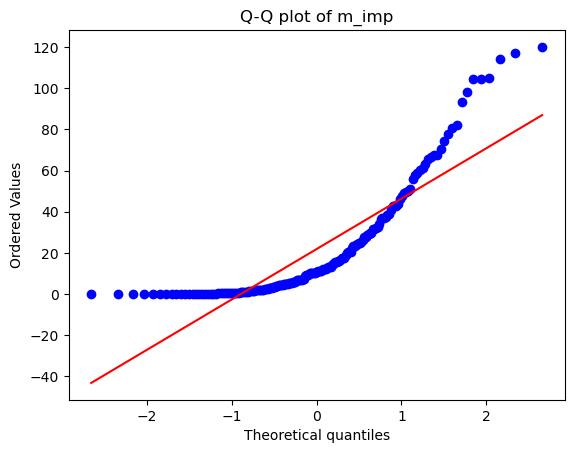

Shapiro-Wilk Test for m_imp: p-value=2.8918395151113826e-15
D’Agostino’s K^2 Test for m_imp: p-value=2.6958257180311336e-14



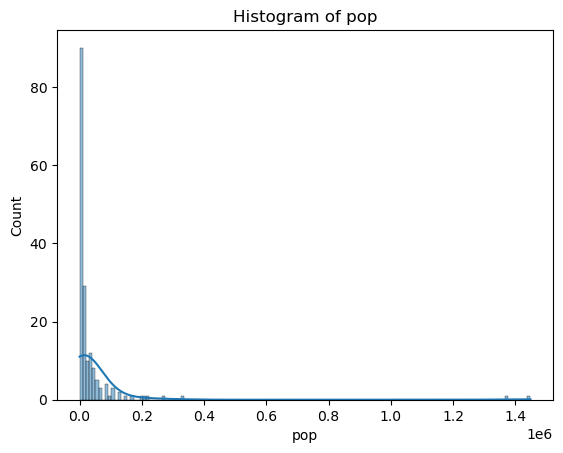

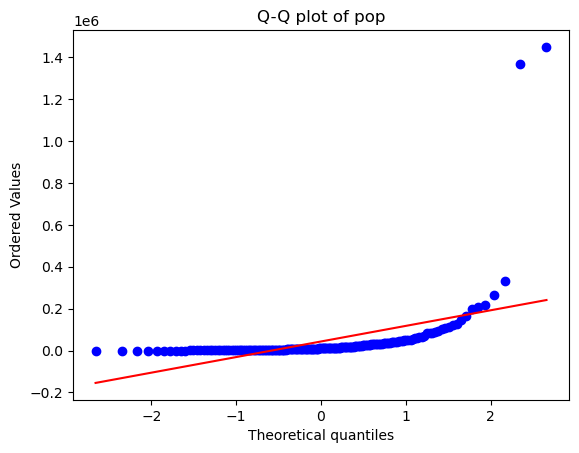

Shapiro-Wilk Test for pop: p-value=2.1341115698702253e-26
D’Agostino’s K^2 Test for pop: p-value=2.189055063469636e-64



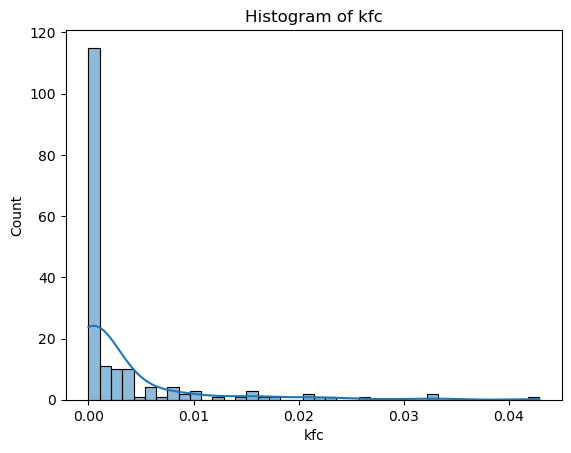

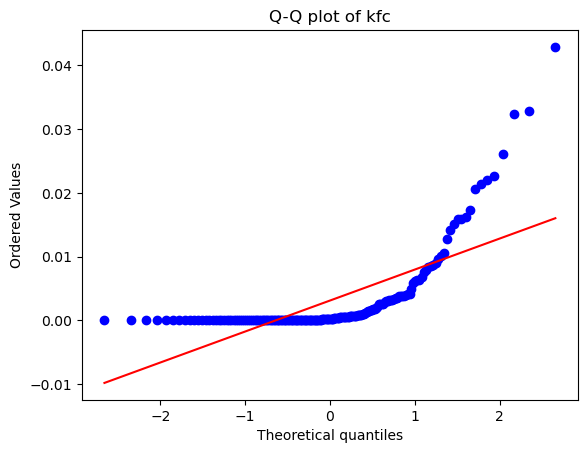

Shapiro-Wilk Test for kfc: p-value=1.652426559513219e-21
D’Agostino’s K^2 Test for kfc: p-value=3.540272500818568e-32



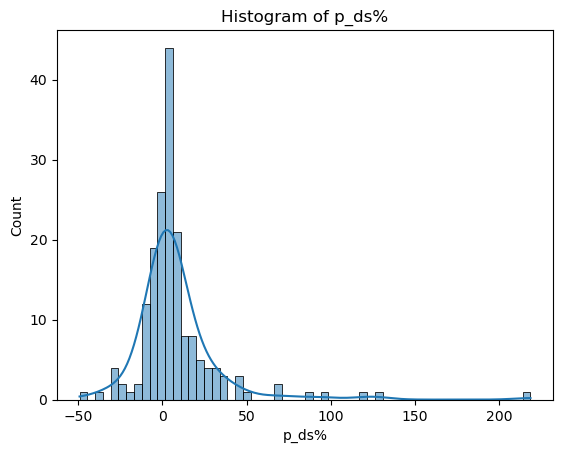

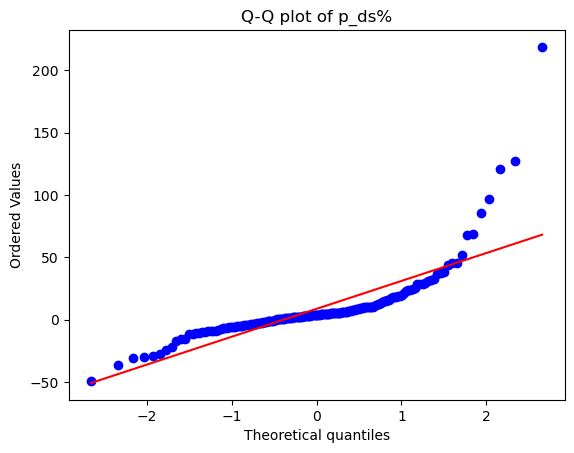

Shapiro-Wilk Test for p_ds%: p-value=2.069048993260274e-18
D’Agostino’s K^2 Test for p_ds%: p-value=5.137951288425313e-39



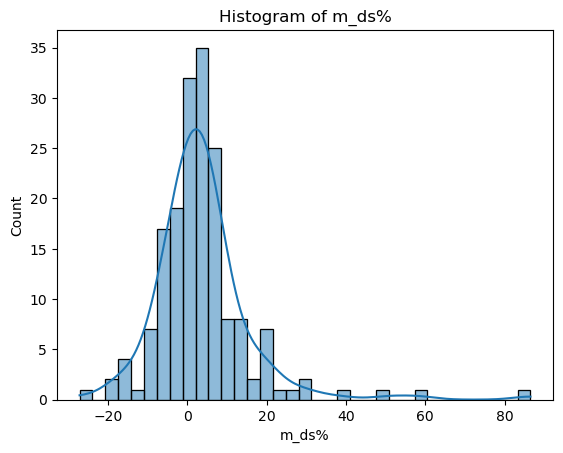

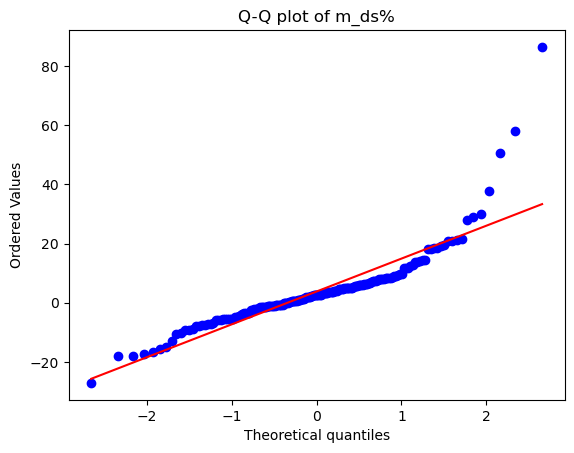

Shapiro-Wilk Test for m_ds%: p-value=4.526044998314459e-14
D’Agostino’s K^2 Test for m_ds%: p-value=1.8027660052622395e-28



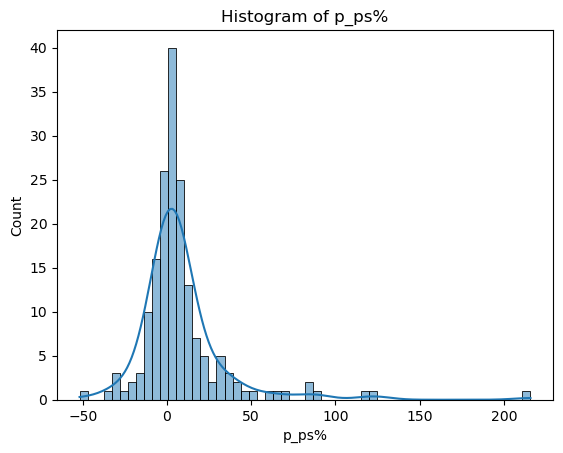

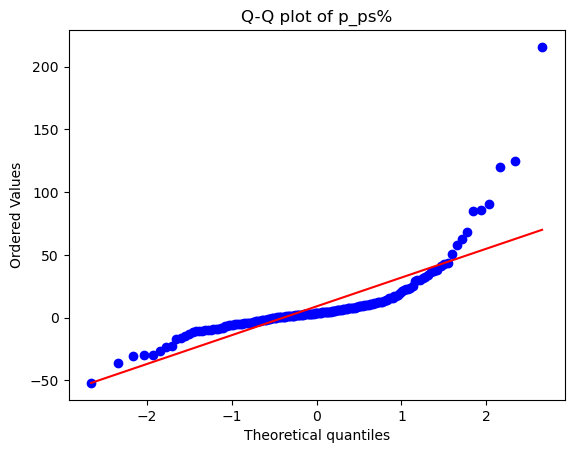

Shapiro-Wilk Test for p_ps%: p-value=5.603303271460733e-18
D’Agostino’s K^2 Test for p_ps%: p-value=7.224735549428174e-37



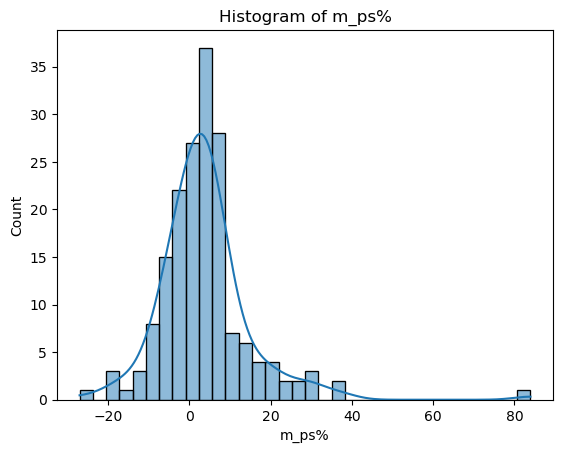

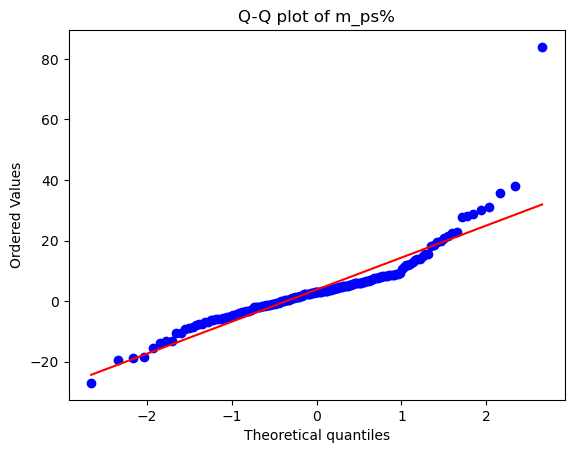

Shapiro-Wilk Test for m_ps%: p-value=1.6547959834009585e-12
D’Agostino’s K^2 Test for m_ps%: p-value=3.1135824267752415e-26



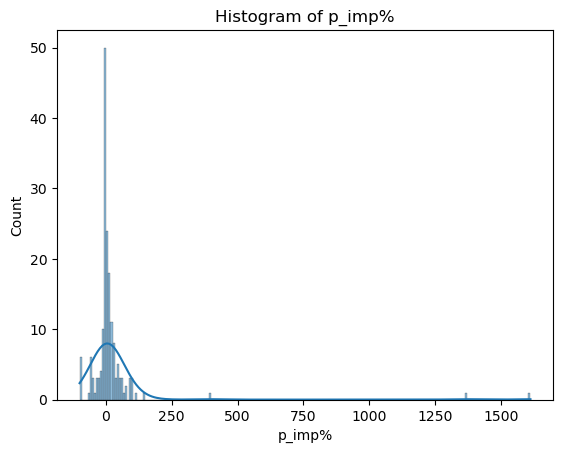

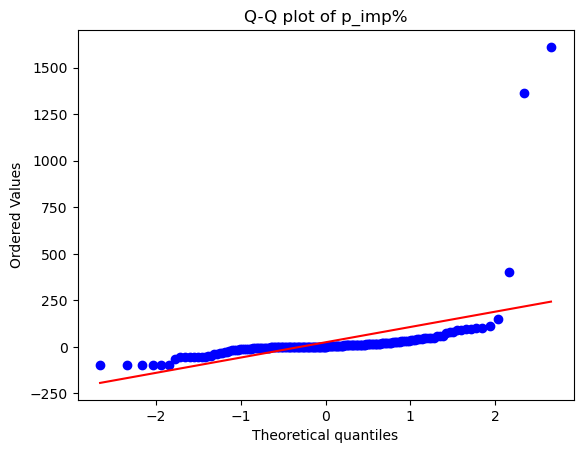

Shapiro-Wilk Test for p_imp%: p-value=3.808001379485721e-26
D’Agostino’s K^2 Test for p_imp%: p-value=1.8031728602074517e-65



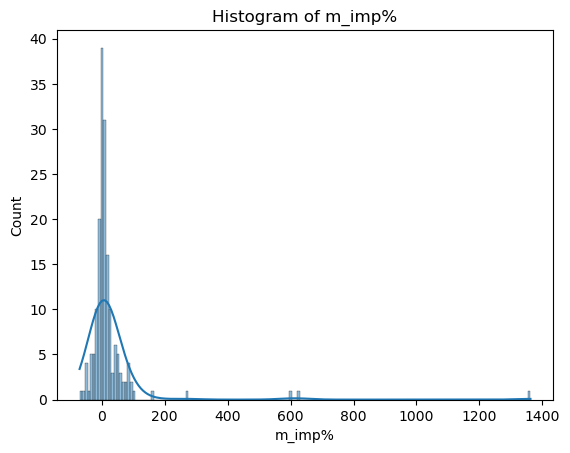

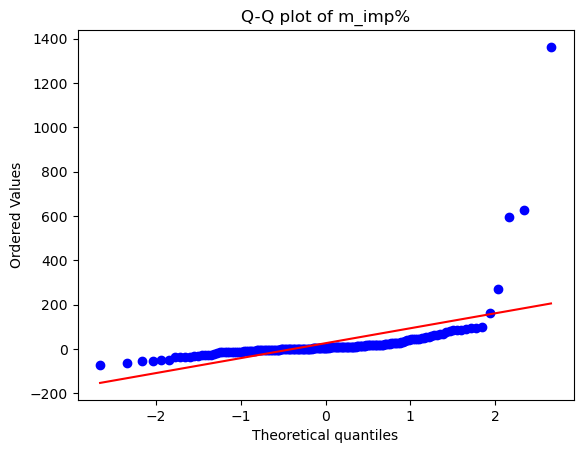

Shapiro-Wilk Test for m_imp%: p-value=1.5291643402377593e-25
D’Agostino’s K^2 Test for m_imp%: p-value=1.3145177051324094e-65



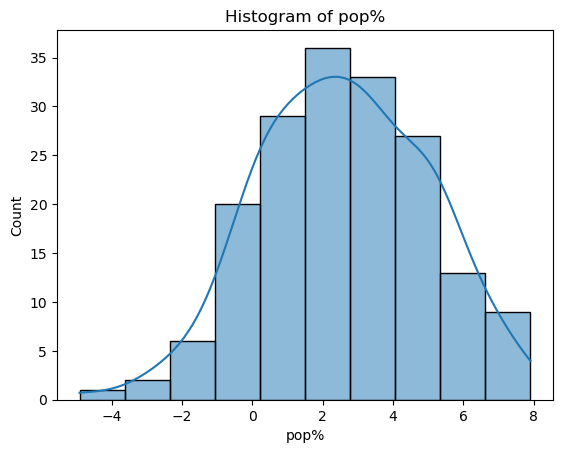

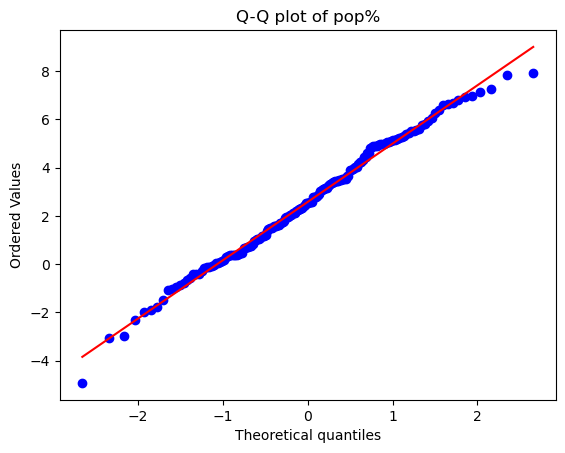

Shapiro-Wilk Test for pop%: p-value=0.5146885514259338
D’Agostino’s K^2 Test for pop%: p-value=0.6655705771435645



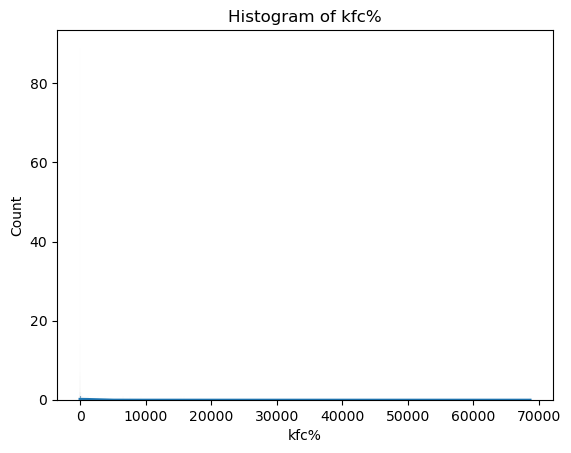

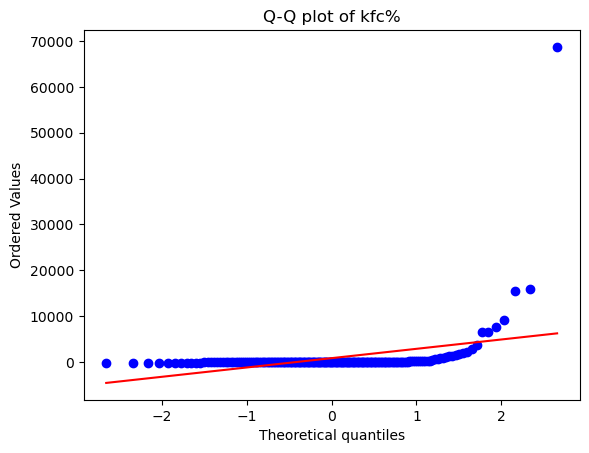

Shapiro-Wilk Test for kfc%: p-value=1.2052507147609238e-27
D’Agostino’s K^2 Test for kfc%: p-value=5.9904917229530475e-77



In [177]:
# Checking if my data is Guassian, normally distributed or not.
for column in df.columns:
    # Plot histograms
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()
    # Interpretation: should be showing a normal distribution graph if its Guassian.
    
    # Q-Q plot
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')
    plt.show()
    # Interpretation: should be shoing data points on the line if its Guassian
    
    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(df[column])
    print(f'Shapiro-Wilk Test for {column}: p-value={shapiro_test[1]}')
    # Should be over 0.05 if it is Guassian
    
    # D’Agostino’s K^2 Test
    dagostino_test = stats.normaltest(df[column])
    print(f'D’Agostino’s K^2 Test for {column}: p-value={dagostino_test[1]}\n')
    # Should be over 0.05 if its Guassian

As we can see from above, the data is not Guassian or normally distributed. We reject the null Hypothesis for most of these variables in favor of the alternative hypothesis.



This means that we will use the min-max scaler later on.

### Min Max Scaler

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
df_mm = scaler.fit_transform(df)
df_mm

array([[-0.97873099, -0.9003198 , -0.973561  , ..., -0.94987079,
         0.68952342, -0.99709302],
       [-0.81146454, -0.43072119, -0.77361608, ..., -0.96886745,
        -0.25529988, -0.99709302],
       [-0.86546461, -0.72847625, -0.83916277, ..., -0.94030298,
         0.38016281, -1.        ],
       ...,
       [ 1.        ,  1.        ,  0.96750207, ..., -0.91525377,
         0.08212299, -0.99709302],
       [-0.81827963, -0.80683639, -0.78463233, ..., -0.89271318,
         0.57418004, -0.99709302],
       [-0.93947908, -0.73461814, -0.92729276, ..., -0.92037609,
         0.75964752, -0.99709302]])

<Axes: ylabel='Density'>

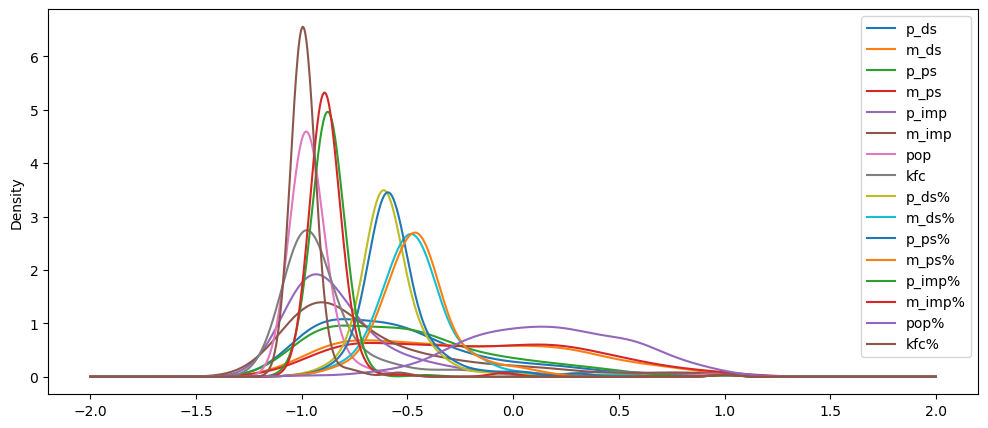

In [179]:
pd.DataFrame(df_mm,columns=df.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

## PCA

### Number of Components

In [180]:
# Create the PCA model
pca = PCA()

# Fit the model with the standardised data
pca.fit(df_mm)

PCA()

In [181]:
pca.explained_variance_ratio_.cumsum()

array([0.55335041, 0.65991302, 0.73665457, 0.80659313, 0.85201214,
       0.89211518, 0.92454753, 0.95095977, 0.96922241, 0.98145856,
       0.98784019, 0.99198485, 0.99555756, 0.99893636, 0.99962543,
       1.        ])

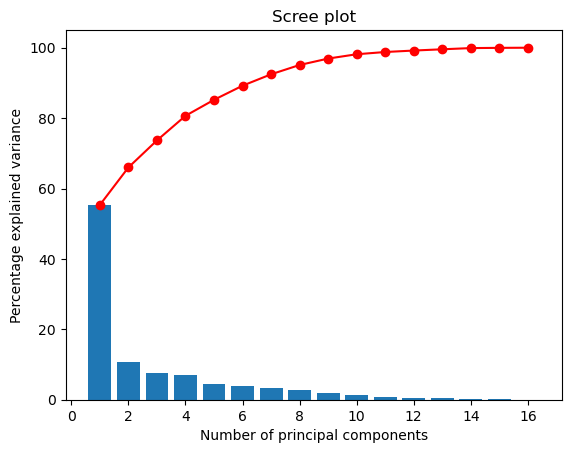

In [182]:
display_scree_plot(pca) 

The first 4 pcas capture over 80pc of the variation, therefore we select the first four pca's as number of components.

In [183]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]

### Correlation circles

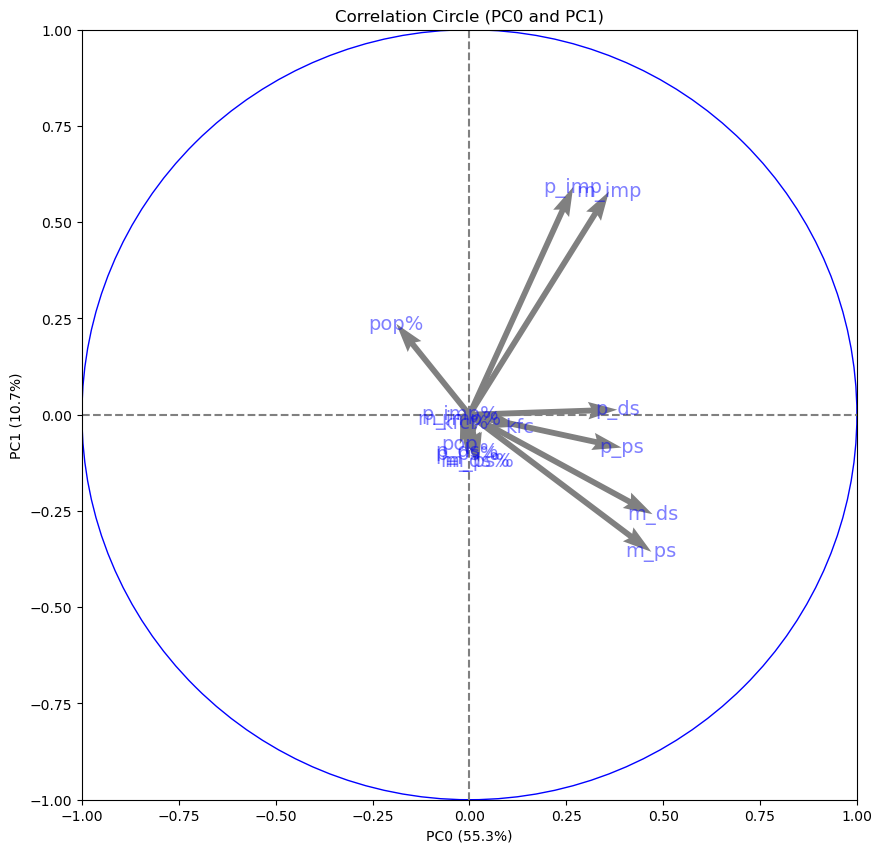

In [184]:
num_components = 5
pcs = pca.components_
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(df.columns))

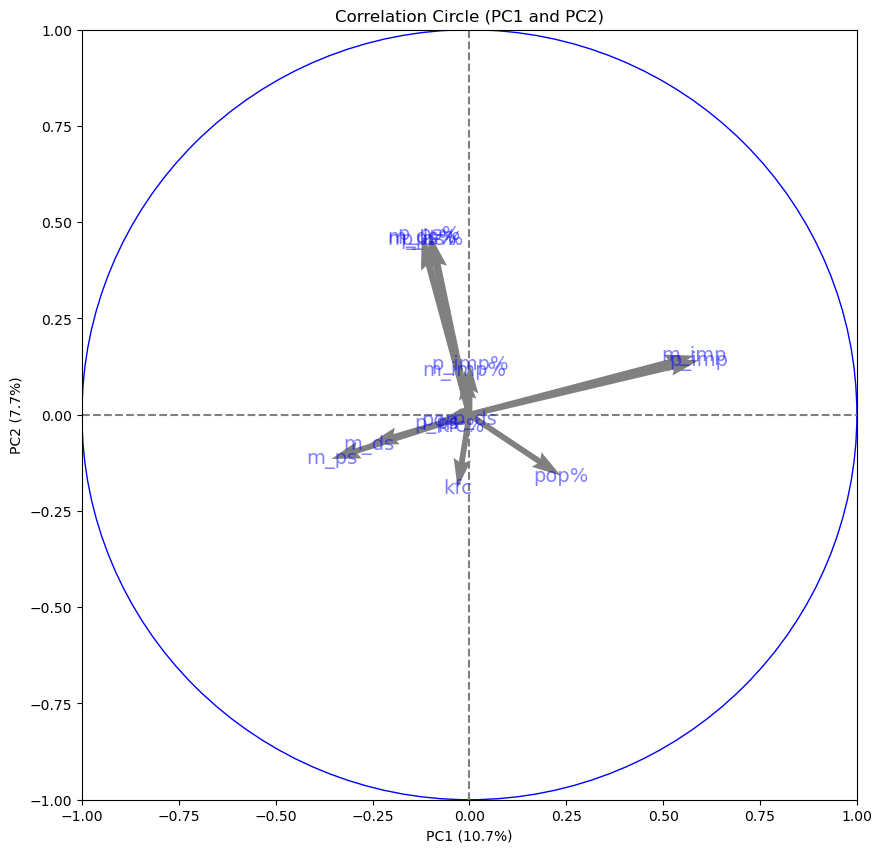

In [185]:
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(df.columns))

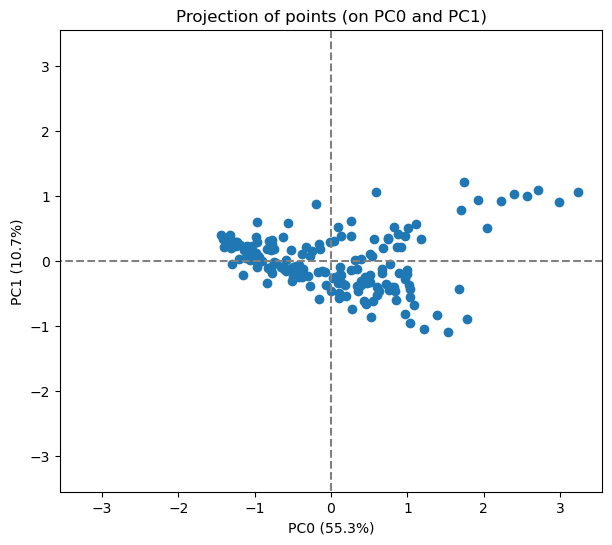

In [186]:
# Transform the original scaled data to the new vector space
df_projected = pca.transform(df_mm) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(df_projected, num_components, pca, [(0,1)])
plt.show()

## K-Means

In [187]:
#This is just because there were some warnings poppin up even if I corrected them.
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

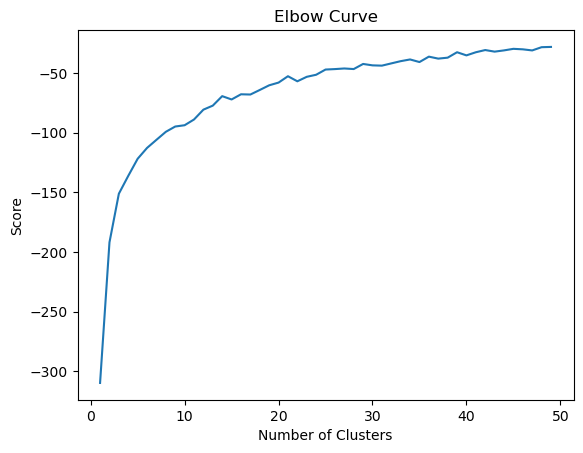

In [188]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_mm).score(df_mm) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [189]:
# I am picking 5 clusters. 
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=5, n_init=10)

# Fit the data to the model
kmeans.fit(df_mm)

# Determine which clusters each data point belongs to:
clusters_k =  kmeans.predict(df_mm)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 4 to 894
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p_ds    176 non-null    float64
 1   m_ds    176 non-null    float64
 2   p_ps    176 non-null    float64
 3   m_ps    176 non-null    float64
 4   p_imp   176 non-null    float64
 5   m_imp   176 non-null    float64
 6   pop     176 non-null    float64
 7   kfc     176 non-null    float64
 8   p_ds%   176 non-null    float64
 9   m_ds%   176 non-null    float64
 10  p_ps%   176 non-null    float64
 11  m_ps%   176 non-null    float64
 12  p_imp%  176 non-null    float64
 13  m_imp%  176 non-null    float64
 14  pop%    176 non-null    float64
 15  kfc%    176 non-null    float64
dtypes: float64(16)
memory usage: 23.4 KB


In [191]:
pd.DataFrame(df_mm).head(2)

0         1         2         3         4         5         6   \
0 -0.978731 -0.900320 -0.973561 -0.881072 -0.984122 -0.985922 -0.949424   
1 -0.811465 -0.430721 -0.773616 -0.344084 -0.902816 -0.889976 -0.996095   

         7         8         9         10        11        12        13  \
0 -1.000000 -0.837408 -0.799639 -0.811721 -0.794555 -0.925469 -0.949871   
1 -0.967595 -0.861208 -0.687680 -0.842655 -0.677036 -0.948000 -0.968867   

         14        15  
0  0.689523 -0.997093  
1 -0.255300 -0.997093

In [192]:
# Add cluster number to the original data
df_k = pd.DataFrame(df_mm, columns=df.columns, index=df.index)
df_k['cluster'] = clusters_k

df_k.head(2)

p_ds      m_ds      p_ps      m_ps     p_imp     m_imp       pop  \
area_c                                                                         
4      -0.978731 -0.900320 -0.973561 -0.881072 -0.984122 -0.985922 -0.949424   
8      -0.811465 -0.430721 -0.773616 -0.344084 -0.902816 -0.889976 -0.996095   

             kfc     p_ds%     m_ds%     p_ps%     m_ps%    p_imp%    m_imp%  \
area_c                                                                         
4      -1.000000 -0.837408 -0.799639 -0.811721 -0.794555 -0.925469 -0.949871   
8      -0.967595 -0.861208 -0.687680 -0.842655 -0.677036 -0.948000 -0.968867   

            pop%      kfc%  cluster  
area_c                               
4       0.689523 -0.997093        1  
8      -0.255300 -0.997093        4

In [193]:
# Create a PCA model to reduce our data for visualisation
pca = PCA(n_components=5)
pca.fit(df_mm)

# Transfor the scaled data to the new PCA space
reduced = pca.transform(df_mm)

In [194]:
# Convert to a data frame
df_reduced = pd.DataFrame(reduced, index=df.index, columns=['PC1','PC2','PC3','PC4', 'PC5'])
df_reduced['cluster'] = clusters_k
df_reduced.head()

PC1       PC2       PC3       PC4       PC5  cluster
area_c                                                           
4      -1.323989  0.392287 -0.573041 -0.074240  0.081067        1
8      -0.461742 -0.074094 -0.433211  0.555523 -0.220890        4
12     -0.988452  0.117976 -0.271516  0.023542 -0.011528        1
24     -0.768163  0.318348  0.332666 -0.509968  0.328226        1
28      2.716515  1.089799  0.893419 -0.150275  0.119274        2

In [195]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

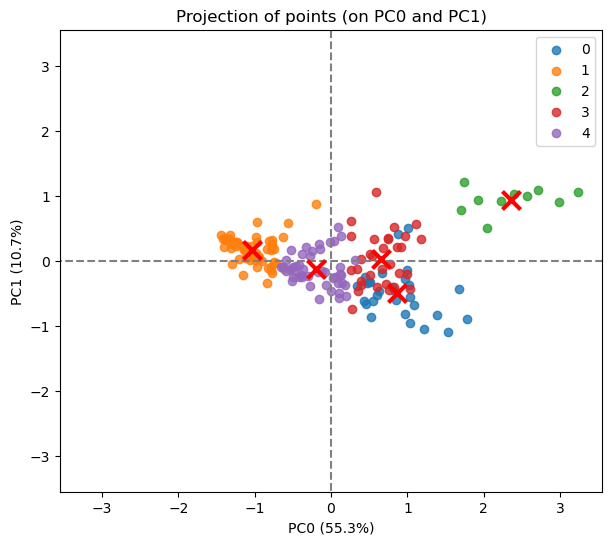

In [196]:
display_factorial_planes(reduced, 2, pca, [(0, 1)], illustrative_var=clusters_k, alpha=0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)


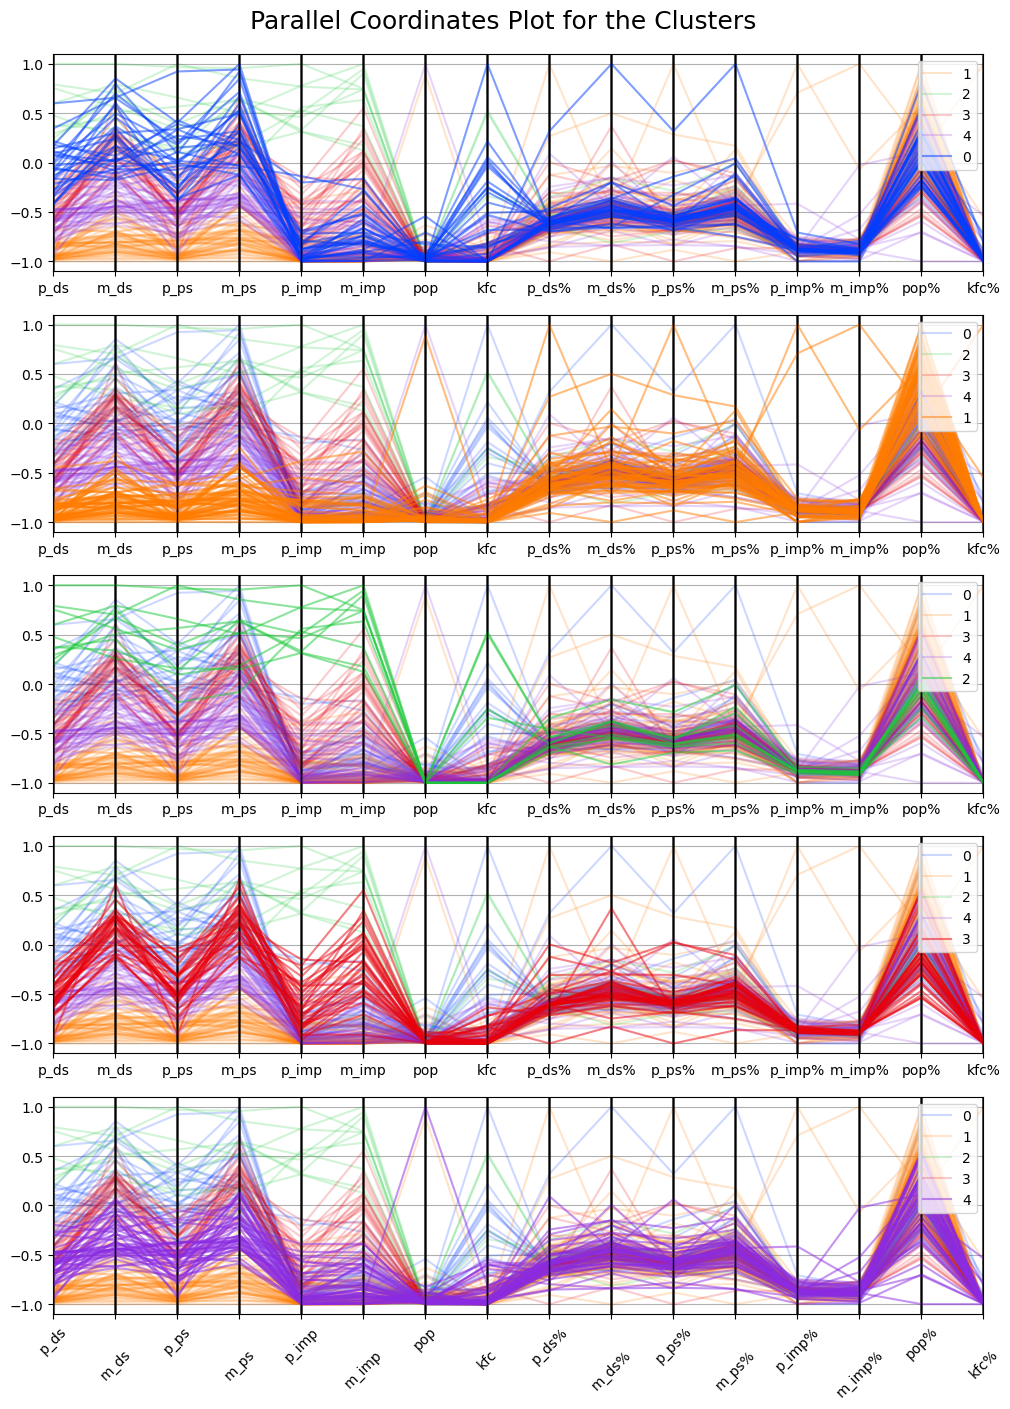

In [197]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(df_k, 5)


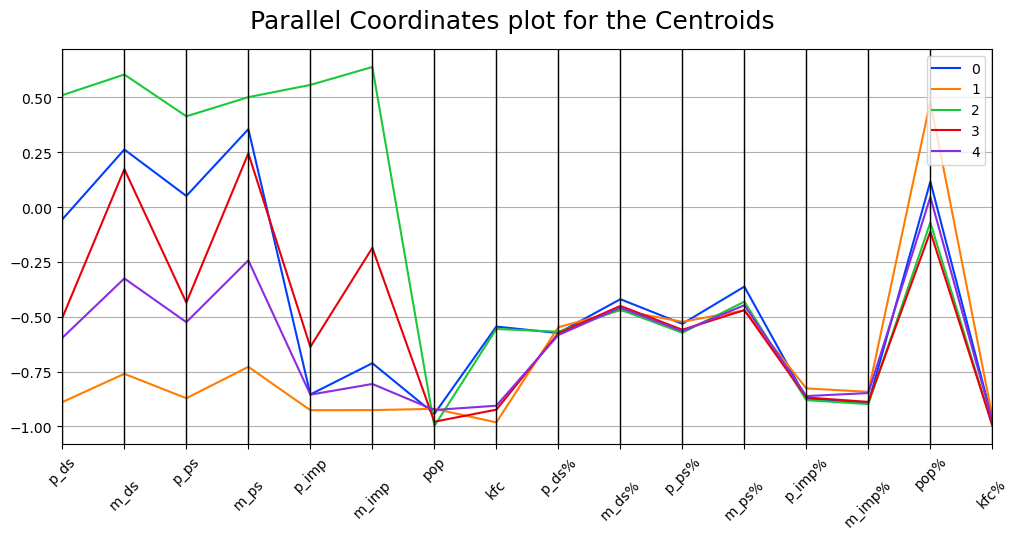

In [198]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 5)

In [199]:
df_reduced['cluster'].value_counts()

cluster
1    59
4    46
3    32
0    29
2    10
Name: count, dtype: int64

## Hierarchical clustering

In [200]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

In [201]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=5)
clusters_h = hiercluster.fit_predict(df_mm) 

In [202]:
# Add cluster number to the original data
df_h = pd.DataFrame(df_mm, columns=df.columns, index = df.index)
df_h['cluster'] = clusters_h
df_h.head()

p_ds      m_ds      p_ps      m_ps     p_imp     m_imp       pop  \
area_c                                                                         
4      -0.978731 -0.900320 -0.973561 -0.881072 -0.984122 -0.985922 -0.949424   
8      -0.811465 -0.430721 -0.773616 -0.344084 -0.902816 -0.889976 -0.996095   
12     -0.865465 -0.728476 -0.839163 -0.682322 -1.000000 -0.972980 -0.942191   
24     -0.755888 -0.651035 -0.709722 -0.609353 -0.750412 -0.743762 -0.956897   
28      0.600162  0.794669  0.659047  0.504132  0.779985  1.000000 -0.999939   

             kfc     p_ds%     m_ds%     p_ps%     m_ps%    p_imp%    m_imp%  \
area_c                                                                         
4      -1.000000 -0.837408 -0.799639 -0.811721 -0.794555 -0.925469 -0.949871   
8      -0.967595 -0.861208 -0.687680 -0.842655 -0.677036 -0.948000 -0.968867   
12     -1.000000 -0.680160 -0.624421 -0.664069 -0.616283 -1.000000 -0.940303   
24     -0.986585 -0.360871 -0.295901 -0.339033 -0.267498 -0.831851 -0.867782   
28     -1.000000 -0.346145 -0.156556 -0.285121 -0.009715 -0.838340 -0.851006   

            pop%      kfc%  cluster  
area_c                               
4       0.689523 -0.997093        0  
8      -0.255300 -0.997093        3  
12      0.380163 -1.000000        0  
24      0.899514 -0.995640        0  
28     -0.049198 -0.997093        2

In [203]:
# Size of the clusters
pd.DataFrame(df_h["cluster"].value_counts())

count
cluster       
0           57
3           44
4           40
1           25
2           10

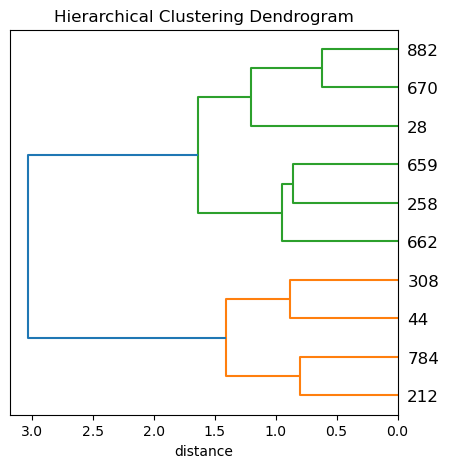

In [204]:
# Show a dendrogram, just for the smallest cluster, 2.
from scipy.cluster.hierarchy import linkage, fcluster 
sample = df_h[df_h.cluster==2]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(5,5))

In [205]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(df_mm)

# Transfor the scaled data to the new PCA space
df_reduced = pca.transform(df_mm)

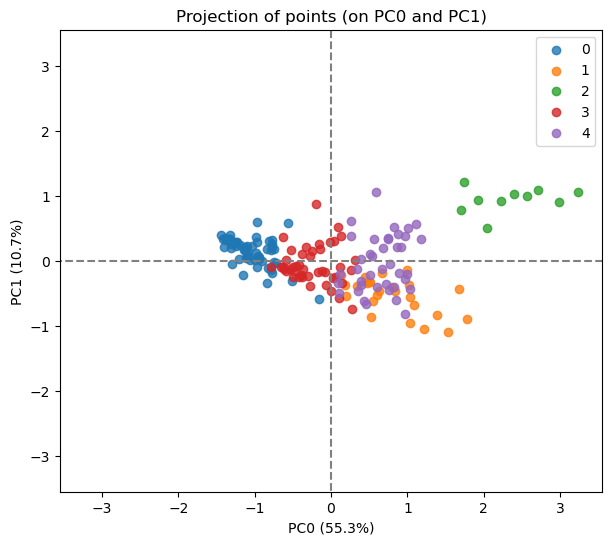

In [206]:
display_factorial_planes(df_reduced, 2, pca, [(0,1)], illustrative_var = clusters_h, alpha = 0.8)

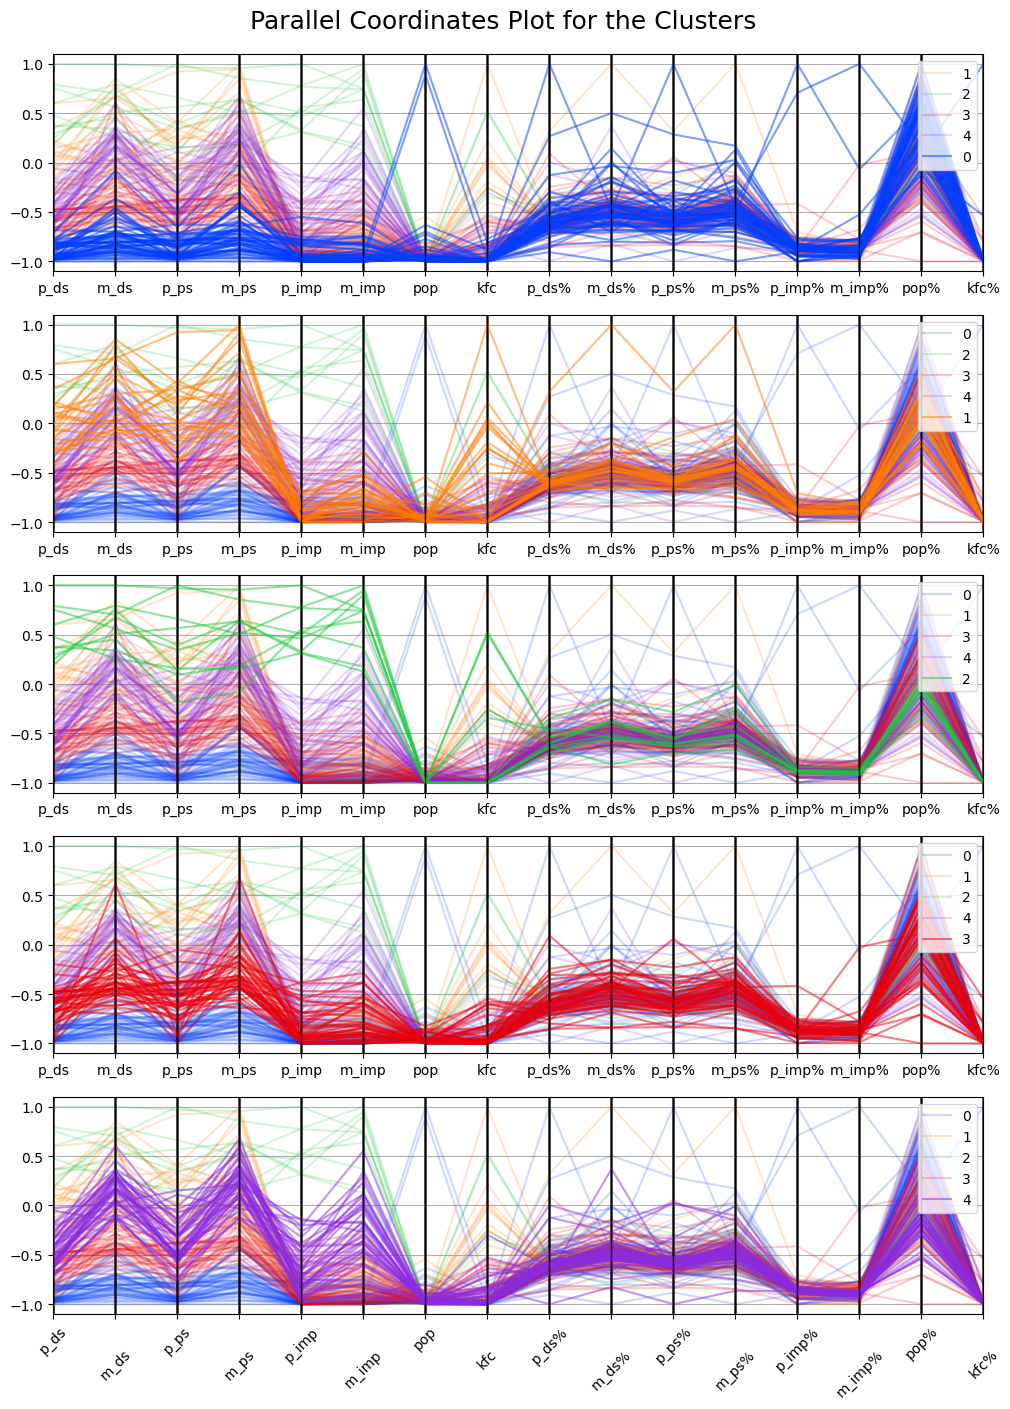

In [207]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(df_h, 5)

In [208]:
means =  df_h.groupby(by="cluster").mean()

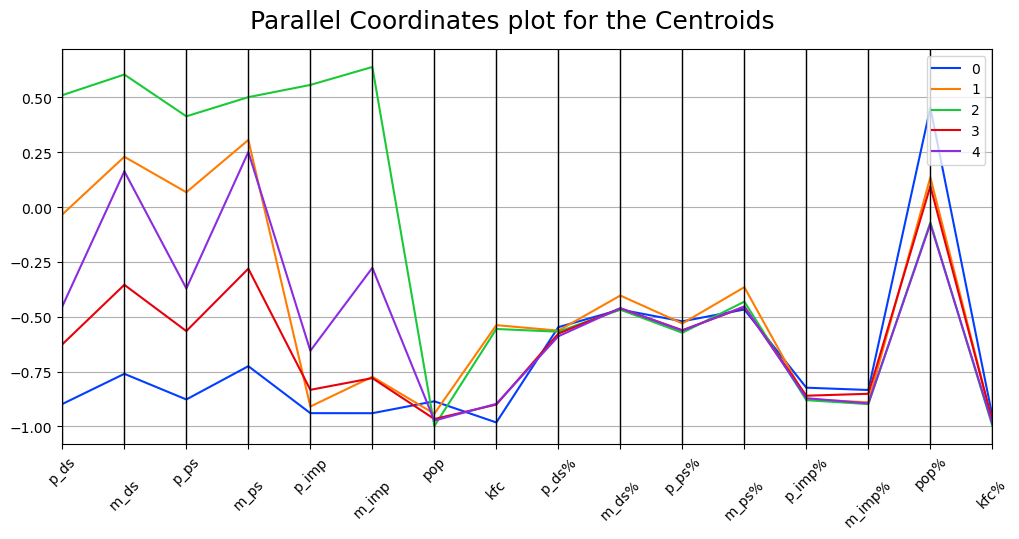

In [209]:
display_parallel_coordinates_centroids(means.reset_index(), 5)

## Comparison

In [210]:
#df with k-mean clusters 
display(df_k.head(2))
#df with hierarchical clustering clusters
display(df_h.head(2))

p_ds      m_ds      p_ps      m_ps     p_imp     m_imp       pop  \
area_c                                                                         
4      -0.978731 -0.900320 -0.973561 -0.881072 -0.984122 -0.985922 -0.949424   
8      -0.811465 -0.430721 -0.773616 -0.344084 -0.902816 -0.889976 -0.996095   

             kfc     p_ds%     m_ds%     p_ps%     m_ps%    p_imp%    m_imp%  \
area_c                                                                         
4      -1.000000 -0.837408 -0.799639 -0.811721 -0.794555 -0.925469 -0.949871   
8      -0.967595 -0.861208 -0.687680 -0.842655 -0.677036 -0.948000 -0.968867   

            pop%      kfc%  cluster  
area_c                               
4       0.689523 -0.997093        1  
8      -0.255300 -0.997093        4

p_ds      m_ds      p_ps      m_ps     p_imp     m_imp       pop  \
area_c                                                                         
4      -0.978731 -0.900320 -0.973561 -0.881072 -0.984122 -0.985922 -0.949424   
8      -0.811465 -0.430721 -0.773616 -0.344084 -0.902816 -0.889976 -0.996095   

             kfc     p_ds%     m_ds%     p_ps%     m_ps%    p_imp%    m_imp%  \
area_c                                                                         
4      -1.000000 -0.837408 -0.799639 -0.811721 -0.794555 -0.925469 -0.949871   
8      -0.967595 -0.861208 -0.687680 -0.842655 -0.677036 -0.948000 -0.968867   

            pop%      kfc%  cluster  
area_c                               
4       0.689523 -0.997093        0  
8      -0.255300 -0.997093        3

In [211]:
# I am retrieving the clusters for each country based on the method used.
merged_df = pd.merge(df_k, df_h, left_index=True, right_index=True, how='inner',suffixes=('_k', '_h'))
clusters=merged_df[['cluster_k','cluster_h']]

In [212]:
display(clusters.head())
countries.head()

cluster_k  cluster_h
area_c                      
4               1          0
8               4          3
12              1          0
24              1          0
28              2          2

country
area_c                     
4               Afghanistan
8                   Albania
12                  Algeria
24                   Angola
28      Antigua and Barbuda

In [213]:
display(pd.DataFrame(df_k['cluster'].value_counts()))

count
cluster       
1           59
4           46
3           32
0           29
2           10

In [214]:
display(pd.DataFrame(df_h['cluster'].value_counts()))

count
cluster       
0           57
3           44
4           40
1           25
2           10

In [215]:
# I am adding the country names and making it the index.

cluster_df=pd.merge(clusters,countries,left_index= True, right_index=True, how='inner').reset_index()

In [216]:
cluster_df = cluster_df.set_index(['area_c', 'country'])

In [217]:
cluster_df.head()

cluster_k  cluster_h
area_c country                                  
4      Afghanistan                  1          0
8      Albania                      4          3
12     Algeria                      1          0
24     Angola                       1          0
28     Antigua and Barbuda          2          2

In [218]:
# Initialize dictionaries to store similarities and counts
similarities = {}
counts = {}

# Loop through each unique value in cluster_k
for k in clusters['cluster_k'].unique():
    # Find countries in cluster_k with value k
    countries_k = set(clusters[clusters['cluster_k'] == k].index)
    
    # Loop through each unique value in cluster_h
    for h in clusters['cluster_h'].unique():
        # Find countries in cluster_h with value h
        countries_h = set(clusters[clusters['cluster_h'] == h].index)
        
        # Calculate similarity (intersection) and count (union)
        similarity = len(countries_k.intersection(countries_h))
        count = len(countries_k.union(countries_h))
        
        # Store similarity and count in dictionaries
        similarities[(k, h)] = similarity
        counts[(k, h)] = count


In [219]:
# Calculating the % of similarities
perc_similarity = {}

for p in similarities:
    perc_similarity[p]=round((similarities[p]/counts[p]) *100)


In [220]:
# sorting it by descending orden
sorted_perc_similarity = dict(sorted(perc_similarity.items(), key=lambda item: item[1], reverse=True))

# only keeping the first 4 items
pairings = dict(list(sorted_perc_similarity.items())[:5])

In [221]:
pairings = pd.DataFrame(pairings.items(), columns=['Key', 'Value']).reset_index(drop=True)
pairings

Key  Value
0  (2, 2)    100
1  (1, 0)     90
2  (4, 3)     73
3  (3, 4)     71
4  (0, 1)     69

Now that I know which group in k-means is which in hierarchical clustering, I am going to take a closer look the k-means cluster and hieararchical clustering cluster that got the highest scores on domestic supply, protein, and import of poultry and meat as well as they scored relatively high on the kfc stores/1,000 people variable in comparison to other groups.

In [222]:
cluster_df=cluster_df.reset_index()

In [223]:
# The highest matching rate clusters are also the ones wich are score best on the paralell coordinates plots; 
top_cluster=cluster_df[cluster_df['cluster_k']==  pairings.loc[0, 'Key'][0]]

In [224]:
top_cluster= top_cluster.set_index('area_c')

In [225]:
df.head(2)

p_ds       m_ds  p_ps   m_ps     p_imp     m_imp       pop  \
area_c                                                                   
4       1.444662   8.804261  0.66   3.94  0.681444  0.844991  36686.78   
8       9.384743  39.624471  4.29  17.26  4.170997  6.604079   2877.01   

             kfc      p_ds%      m_ds%      p_ps%      m_ps%     p_imp%  \
area_c                                                                    
4       0.000000 -27.481711 -15.760706 -26.666667 -15.631692 -36.209052   
8       0.000695 -30.671774  -9.396445 -30.806452  -9.110058 -55.492991   

           m_imp%      pop%  kfc%  
area_c                             
4      -34.961585  5.920307   0.0  
8      -48.576361 -0.140573   0.0

In [226]:
# Reset the indices of both dataframes
df.reset_index(inplace=True)
top_cluster.reset_index(inplace=True)

# Merge the dataframes on the 'area_c' column
top1_df = pd.merge(df, top_cluster, on='area_c')
top1_df.set_index(['area_c','country'], inplace=True)

In [227]:
top1_df

p_ds        m_ds   p_ps   m_ps  \
area_c country                                                                 
28     Antigua and Barbuda               76.394194  120.048019  30.30  38.30   
44     Bahamas                           59.714862  111.965365  25.48  41.83   
212    Dominica                          70.601525   84.721830  21.21  29.53   
258    French Polynesia                  57.121737  117.603575  20.86  41.64   
308    Grenada                           65.659882   90.282337  20.05  30.39   
659    Saint Kitts and Nevis             83.752094  104.690117  24.59  38.69   
662    Saint Lucia                       61.835966  101.186126  28.63  41.57   
670    Saint Vincent and the Grenadines  85.486322  113.981763  36.49  47.00   
784    United Arab Emirates              65.316072   97.481776  14.95  23.80   
882    Samoa                             95.374344  133.524082  35.90  49.50   

                                             p_imp       m_imp      pop  \
area_c country                                                            
28     Antigua and Barbuda               76.394194  120.048019    91.63   
44     Bahamas                           64.691100  116.941604   401.91   
212    Dominica                          56.481220   70.601525    70.82   
258    French Polynesia                  57.121737  114.243473   297.61   
308    Grenada                           65.659882   82.074852   121.84   
659    Saint Kitts and Nevis             62.814070  104.690117    47.76   
662    Saint Lucia                       56.214515   67.457418   177.89   
670    Saint Vincent and the Grenadines  75.987842  104.483283   105.28   
784    United Arab Emirates              66.957179   98.138218  9140.17   
882    Samoa                             85.836910  104.911779   209.70   

                                              kfc      p_ds%      m_ds%  \
area_c country                                                            
28     Antigua and Barbuda               0.000000  38.365164  20.794985   
44     Bahamas                           0.032346  12.599480   5.562013   
212    Dominica                          0.014120  23.693872  -1.044903   
258    French Polynesia                  0.000000   4.796966   7.879230   
308    Grenada                           0.032830  12.531657   8.311720   
659    Saint Kitts and Nevis             0.000000   0.062814 -16.614322   
662    Saint Lucia                       0.000000  -9.095977  -0.831975   
670    Saint Vincent and the Grenadines  0.000000   0.645897   0.645897   
784    United Arab Emirates              0.015973   4.161300   8.244004   
882    Samoa                             0.000000  -1.983786  -1.983786   

                                             p_ps%      m_ps%     p_imp%  \
area_c country                                                             
28     Antigua and Barbuda               43.806360  27.922512  38.365164   
44     Bahamas                            9.874946   5.232704  -1.475455   
212    Dominica                           0.283688  -0.639300  -1.044903   
258    French Polynesia                   1.311316   0.385728  -1.367562   
308    Grenada                            8.436993  12.057522  12.531657   
659    Saint Kitts and Nevis            -10.905797  -8.943281 -24.952889   
662    Saint Lucia                       -2.949153  -1.795417  -0.831975   
670    Saint Vincent and the Grenadines   0.385144  -0.021272   0.645897   
784    United Arab Emirates               5.653710  15.702479  12.777206   
882    Samoa                             -3.260577  -4.661017 -11.785408   

                                            m_imp%      pop%       kfc%  \
area_c country                                                            
28     Antigua and Barbuda               35.894358  1.181537   0.000000   
44     Bahamas                           -3.528049  1.497550 -35.000000   
212    Dominica                          -1.044903  1.055936 -99.19354

In [228]:
#making a new dataframe with new index for plots
plot_top1_df = top1_df.reset_index()

In [229]:
# Calculating the original kfc values
plot_top1_df['kfc']=(plot_top1_df['kfc']*plot_top1_df['pop'])

In [230]:
plot_top1_df[['country','kfc']]

country    kfc
0               Antigua and Barbuda    0.0
1                           Bahamas   13.0
2                          Dominica    1.0
3                  French Polynesia    0.0
4                           Grenada    4.0
5             Saint Kitts and Nevis    0.0
6                       Saint Lucia    0.0
7  Saint Vincent and the Grenadines    0.0
8              United Arab Emirates  146.0
9                             Samoa    0.0

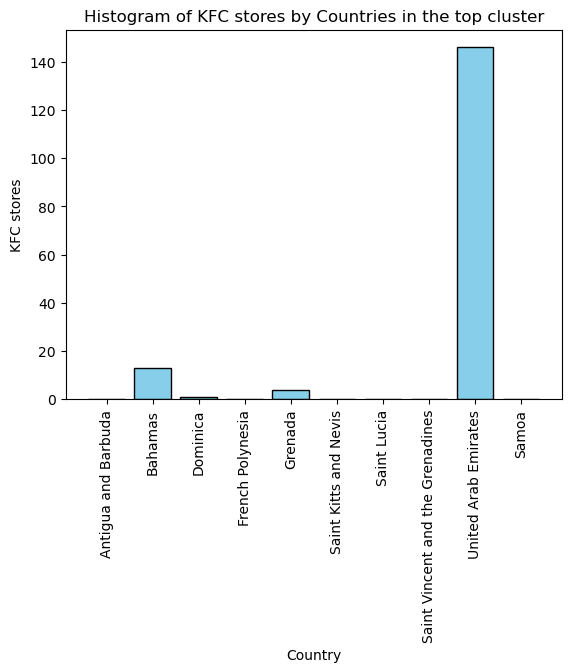

In [231]:
plt.bar(plot_top1_df['country'], plot_top1_df['kfc'], color='skyblue', edgecolor='black')

# Plot
plt.xlabel('Country')
plt.ylabel('KFC stores')
plt.title('Histogram of KFC stores by Countries in the top cluster')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()


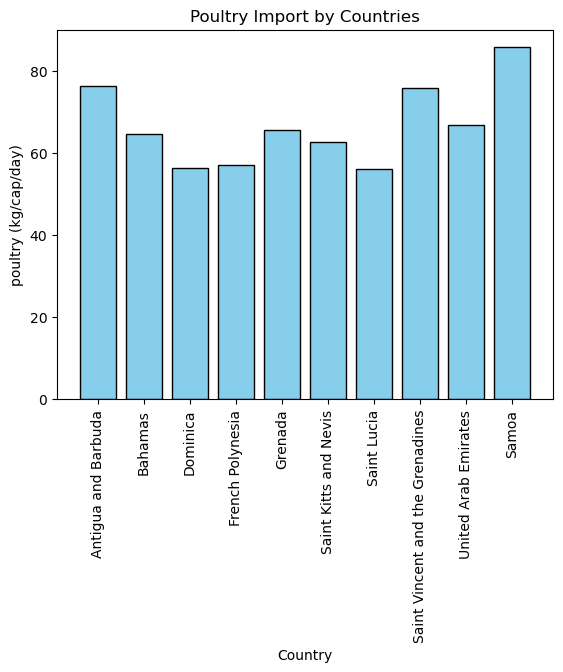

In [232]:
plt.bar(plot_top1_df['country'], plot_top1_df['p_imp'], color='skyblue', edgecolor='black')

# Plot
plt.xlabel('Country')
plt.ylabel('poultry (kg/cap/day)')
plt.title('Poultry Import by Countries')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

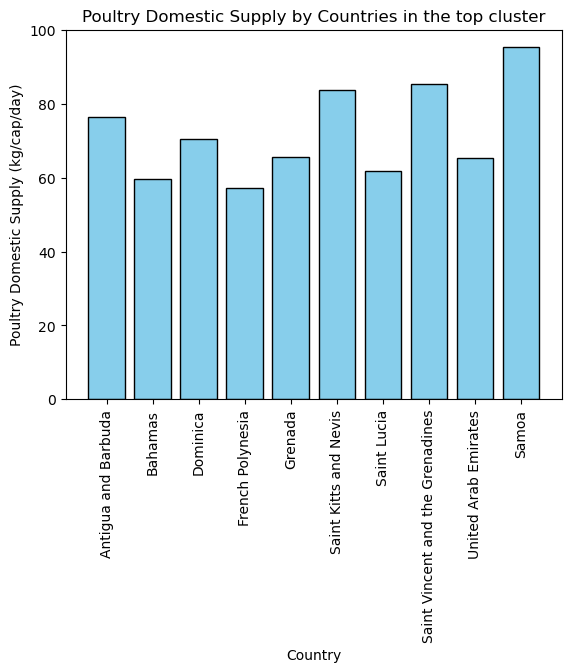

In [233]:
plt.bar(plot_top1_df['country'], plot_top1_df['p_ds'], color='skyblue', edgecolor='black')

# Plot
plt.xlabel('Country')
plt.ylabel('Poultry Domestic Supply (kg/cap/day)')
plt.title('Poultry Domestic Supply by Countries in the top cluster')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

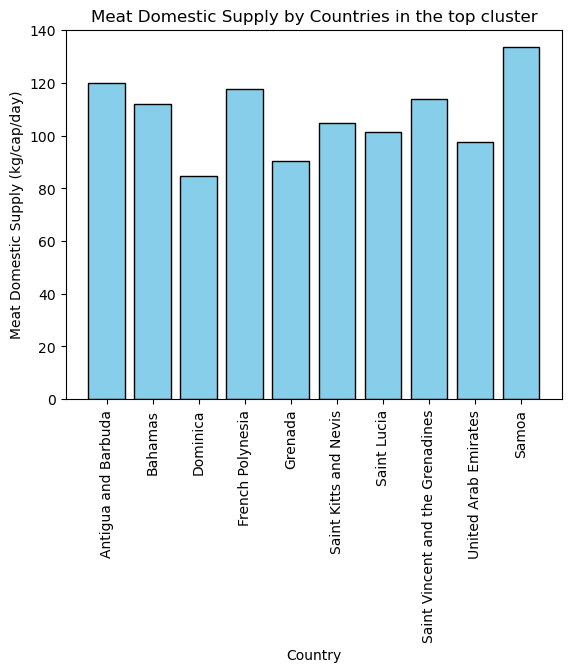

In [234]:
plt.bar(plot_top1_df['country'], plot_top1_df['m_ds'], color='skyblue', edgecolor='black')

# Plot
plt.xlabel('Country')
plt.ylabel('Meat Domestic Supply (kg/cap/day)')
plt.title('Meat Domestic Supply by Countries in the top cluster')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

### Silhouette scores

I am using the silhuette scores to simply udnerstand which clustering method is better for this database in case I need to also examine the dataset further. 

In [235]:
# Silhouette score for K-means clusters
silhouette_avg = silhouette_score(df_mm, clusters_k)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.21761241241167878


In [236]:
# Silhouette score for hierarchical clusters
silhouette_avg = silhouette_score(df_mm, clusters_h)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.19293135312070994


This would indicate that our clusters are overlaping quite a bit, but for our purposes this dones't really matter that much because as we can see, cluster pair we choose with the highest k-means and hierarchical clustering match, is also the most separate group on the Projection of Points chart, telling us that the chosen cluster is quite well separated, and the low silhouette score is probably because of the other clusteres that overlap. 


But we now know that we would pink k-means if we wanted to further study the clusters because it has a higher silhouette score.